# GEN level distributions

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [29]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import dftools
from plotting import var_kw
import itertools
import matplotlib.lines as mlines
plt.style.use('cms')

In [64]:
# options
plot_var = "sjdphi"
labels = (
    r"$\mathcal{CP}\mbox{-}\mathrm{even}\ (\alpha_{gg}=0^{\circ})$",
    r"$\mathcal{CP}\mbox{-}\mathrm{mixed}\ (\alpha_{gg}=45^{\circ})$",
    r"$\mathcal{CP}\mbox{-}\mathrm{odd}\ (\alpha_{gg}=90^{\circ})$",
)

In [6]:
#test = "/vols/cms/akd116/Offline/output/SM/2020/Jul16_2018_gen_sjdphi/JJH0MToTauTauPlusTwoJets_Filtered_mt_2018.root"
#f = uproot.open(test)["gen_ntuple"]
#f.keys()
#df = f.pandas.df([
#    "sjdphi",
#    "wt_cp_prod_sm",
#    "wt_cp_prod_ps",
#    "wt_cp_prod_mm",
#],namedecode="utf-8")

path = "/vols/cms/akd116/Offline/output/SM/2020/Jul16_2018_gen_sjdphi/"
samples = {
    "sm": "JJH0PMToTauTauPlus{}Jets_Filtered",
    "ps": "JJH0MToTauTauPlus{}Jets_Filtered",
    "mm": "JJH0Mf05ph0ToTauTauPlus{}Jets_Filtered",
}
npartons = ["Zero", "One", "Two"]

# get xs, n_events, filter eff. to reweight / stitch
config_path = (
    "/vols/build/cms/akd116/newest/run/CMSSW_8_0_25/src/"
    "UserCode/ICHiggsTauTau/Analysis/HiggsTauTauRun2/scripts/params_2018.json"
)
with open(config_path, 'r') as f:
    config = json.load(f)
lumi = config["Tau"]["lumi"]

df = pd.DataFrame()
for (process, sample) in samples.items():
    for nparton in npartons:
        test = f"{path}/{sample.format(nparton)}_mt_2018.root"
        f = uproot.open(test)["gen_ntuple"]
        length = f.pandas.df("sjdphi").shape[0]
    
        xs = config[sample.format(nparton)]["xs"]
        evt = config[sample.format(nparton)]["evt"]
        eff = config[sample.format(nparton)]["eff"]
        
        weight = (xs * lumi * eff) / evt
        
        tdf = pd.concat([f.pandas.df([
            "sjdphi",
            "n_jets",
            "mjj",
        ],namedecode="utf-8"), pd.DataFrame({
            "weight": [weight] * length,
            "parent": [process] * length,
            #"nparton": [nparton] * length,
        })], axis=1)
        
        # only use dijet phase space
        tdf = tdf.loc[tdf.eval("n_jets>=2"),:]
        tdf.drop(["n_jets"], axis=1, inplace=True)
        
        df = pd.concat([df, tdf])
        display(df)
        
df.set_index(["parent"], inplace=True)

,sjdphi,mjj,weight,parent
44,-2.148628,125.010886,0.03003,sm
74,1.558360,199.597792,0.03003,sm
140,-0.952452,130.101156,0.03003,sm
431,1.180546,39.505092,0.03003,sm
509,-3.019192,259.501974,0.03003,sm
...,...,...,...,...
942623,3.072606,131.358038,0.03003,sm
942701,-0.263319,68.901720,0.03003,sm
942915,-0.364235,306.007508,0.03003,sm
942930,-0.123453,52.127568,0.03003,sm


,sjdphi,mjj,weight,parent
44,-2.148628,125.010886,0.030030,sm
74,1.558360,199.597792,0.030030,sm
140,-0.952452,130.101156,0.030030,sm
431,1.180546,39.505092,0.030030,sm
509,-3.019192,259.501974,0.030030,sm
...,...,...,...,...
3822036,0.355736,50.501610,0.007425,sm
3822041,0.437895,68.271376,0.007425,sm
3822042,-2.448703,139.795974,0.007425,sm
3822053,-2.736952,81.608052,0.007425,sm


,sjdphi,mjj,weight,parent
44,-2.148628,125.010886,0.030030,sm
74,1.558360,199.597792,0.030030,sm
140,-0.952452,130.101156,0.030030,sm
431,1.180546,39.505092,0.030030,sm
509,-3.019192,259.501974,0.030030,sm
...,...,...,...,...
19398632,1.882923,215.410807,0.001207,sm
19398633,2.897287,487.728119,0.001207,sm
19398634,2.917744,224.755613,0.001207,sm
19398635,0.099100,88.373582,0.001207,sm


,sjdphi,mjj,weight,parent
44,-2.148628,125.010886,0.030030,sm
74,1.558360,199.597792,0.030030,sm
140,-0.952452,130.101156,0.030030,sm
431,1.180546,39.505092,0.030030,sm
509,-3.019192,259.501974,0.030030,sm
...,...,...,...,...
1002595,-2.973405,95.170131,0.028376,ps
1002632,-1.746327,86.171612,0.028376,ps
1002902,-2.236883,82.749272,0.028376,ps
1002917,1.065591,177.024709,0.028376,ps


,sjdphi,mjj,weight,parent
44,-2.148628,125.010886,0.030030,sm
74,1.558360,199.597792,0.030030,sm
140,-0.952452,130.101156,0.030030,sm
431,1.180546,39.505092,0.030030,sm
509,-3.019192,259.501974,0.030030,sm
...,...,...,...,...
5540817,1.889776,99.060158,0.005122,ps
5540819,0.987342,63.244552,0.005122,ps
5540822,1.507803,147.943875,0.005122,ps
5540823,-2.136899,182.262864,0.005122,ps


,sjdphi,mjj,weight,parent
44,-2.148628,125.010886,0.030030,sm
74,1.558360,199.597792,0.030030,sm
140,-0.952452,130.101156,0.030030,sm
431,1.180546,39.505092,0.030030,sm
509,-3.019192,259.501974,0.030030,sm
...,...,...,...,...
19900861,-0.247102,176.644967,0.001149,ps
19900862,0.572797,90.588927,0.001149,ps
19900863,-1.853137,189.918405,0.001149,ps
19900864,-2.367293,260.898003,0.001149,ps


,sjdphi,mjj,weight,parent
44,-2.148628,125.010886,0.030030,sm
74,1.558360,199.597792,0.030030,sm
140,-0.952452,130.101156,0.030030,sm
431,1.180546,39.505092,0.030030,sm
509,-3.019192,259.501974,0.030030,sm
...,...,...,...,...
906101,-2.788138,214.493774,0.062386,mm
906185,-1.001661,45.955189,0.062386,mm
906232,2.954960,119.136757,0.062386,mm
906239,2.964141,84.925581,0.062386,mm


,sjdphi,mjj,weight,parent
44,-2.148628,125.010886,0.030030,sm
74,1.558360,199.597792,0.030030,sm
140,-0.952452,130.101156,0.030030,sm
431,1.180546,39.505092,0.030030,sm
509,-3.019192,259.501974,0.030030,sm
...,...,...,...,...
4347032,-1.833669,70.639073,0.013099,mm
4347033,1.703210,107.195959,0.013099,mm
4347040,-1.125363,346.285613,0.013099,mm
4347041,-1.428227,311.350447,0.013099,mm


,sjdphi,mjj,weight,parent
44,-2.148628,125.010886,0.030030,sm
74,1.558360,199.597792,0.030030,sm
140,-0.952452,130.101156,0.030030,sm
431,1.180546,39.505092,0.030030,sm
509,-3.019192,259.501974,0.030030,sm
...,...,...,...,...
17501737,-1.144660,176.554924,0.002669,mm
17501738,-1.977797,62.418716,0.002669,mm
17501739,1.938562,160.257359,0.002669,mm
17501740,2.315376,113.412939,0.002669,mm


In [93]:
itertools.cycle(["#253494","#D62839","#006837"])

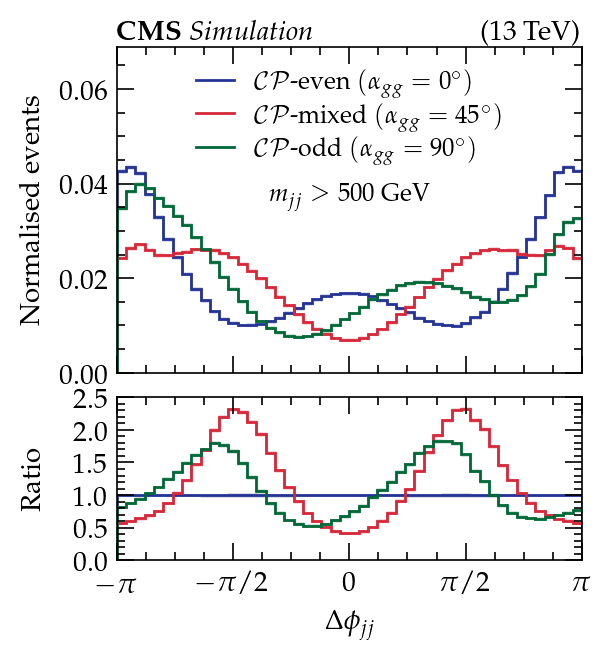

In [101]:
prop_cycle = plt.rcParams['axes.prop_cycle']
#colors = itertools.cycle(prop_cycle.by_key()['color'])
colors = itertools.cycle(["#253494","#D62839","#006837"])
fig, ax = plt.subplots(
    2, 1, 
    figsize=(3., 3.4), dpi=200,
    sharex=True, 
    gridspec_kw={"height_ratios": (2, 1), "hspace": 0.1, "wspace": 0.1}
)

def cms_label(ax, label, lumi=35.9, energy=13, extra_label=""):
    ax.text(
        0, 1, r'$\mathbf{CMS}\ \mathit{'+label+'}$',
        ha='left', va='bottom', transform=ax.transAxes,
    )
    ax.text(
        1, 1, r'({:.0f} TeV)'.format(energy),
        ha='right', va='bottom', transform=ax.transAxes,
    )
cms_label(ax[0], "Simulation")
#cms_label(ax[0], label='')

handles = np.empty(3, dtype=object)

bin_edges = np.linspace(-np.pi, np.pi, endpoint=True, num=51)
bin_low_edge = bin_edges[:-1]
for idx, (process, sample) in enumerate(samples.items()):
    process_mask = df.index.get_level_values("parent") != process
    tdf = df.loc[~process_mask, :]
    # mjj selection
    tdf = tdf.loc[tdf.eval("mjj > 500"),:]
    sum_w, _ = np.histogram(
        tdf[plot_var],
        bins=bin_edges,
        weights=tdf["weight"],
    )
    sum_w_total = sum_w.sum()
    sum_w /= sum_w_total
    
    # keep sm to do ratio (it's the first one in the loop anyway)
    if process == "sm":
        sum_w_sm = sum_w
    
    sum_ww, _ = np.histogram(
        tdf[plot_var],
        bins=bin_edges,
        weights=(tdf["weight"])**2,
    )
    sum_ww /= (sum_w_total)**2
    
    # keep sm to do ratio (it's the first one in the loop anyway)
    if process == "sm":
        sum_ww_sm = sum_ww
        
    color=next(colors),
    ax[0].hist(
        bin_low_edge,
        bins=bin_edges,
        histtype='step',
        weights=sum_w,
        color=color,
    )
    up = sum_w + np.sqrt(sum_ww)
    down = sum_w - np.sqrt(sum_ww)
    ax[0].fill_between(
        bin_edges,
        list(up)+[up[-1]],
        list(down)+[down[-1]],
        step='post',
        alpha=0.2,
        color=color,
    )
    
    # ratio
    sum_w_ratio = sum_w / sum_w_sm
    sum_ww_ratio = sum_ww / (sum_w_sm**2)
    ax[1].hist(
        bin_low_edge,
        bins=bin_edges,
        histtype='step',
        weights=sum_w_ratio,
        color=color,
    )
    up = sum_w_ratio + np.sqrt(sum_ww_ratio)
    down = sum_w_ratio - np.sqrt(sum_ww_ratio)
    ax[1].fill_between(
        bin_edges,
        list(up)+[up[-1]],
        list(down)+[down[-1]],
        step='post',
        alpha=0.2,
        color=color,
    )
    line = mlines.Line2D(
        [], [], color=color[0],
    )
    handles[idx] = line
    
ax[0].legend(
    handles=tuple(handles),
    labels=labels,
    loc=9, 
    labelspacing=0.2, 
    fontsize=9,
    framealpha=0,
    #bbox_to_anchor=(1,1)
)

ax[0].text(
    #0.5, 0.5, r'$\forall m(j_1, j_2)$',
    #0.5, 0.5, r'$m(j_1, j_2) > 300\ \mathrm{GeV}$',
    0.5, 0.5, r'$m_{jj} > 500\ \mathrm{GeV}$',
    transform=ax[0].transAxes,
    ha='center', va='bottom',
    fontsize=9.,
)

ax[0].set_ylabel("Normalised events")
ax[1].set_ylabel("Ratio")
try:
    ax[1].set_xlabel(var_kw[plot_var])
except KeyError:
    print(f"{plot_var} not defined in var_kw")
    ax[1].set_xlabel(plot_var.replace("_"," "))
ax[1].set_xlabel(r"$\Delta\phi_{jj}$")
ax[0].set_ylim(0., ax[0].get_ylim()[1]*1.5)
ax[1].set_ylim(0., 2.5)
ax[1].set_yticks([0., 0.5, 1., 1.5, 2., 2.5])
ax[1].set_xlim(-np.pi, np.pi)
ax[1].set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax[1].set_xticklabels(["$-\pi$", "$-\pi/2$", 0, "$\pi/2$", "$\pi$"])

fig.align_labels()
fig.savefig(f"plots/gen_{plot_var}_cpprod_mjj500.pdf", bbox_inches='tight')